<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning/blob/main/week13_Autoencoder_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "generative"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import tensorflow as tf

tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

In [4]:
# 추가 코드 - 8장에서와 동일한 3D 데이터셋을 만듭니다.

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # 3D 데이터 세트 초기화
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # 고르지 않은 분포
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # 타원형
X += 0.28 * np.random.randn(m, 3)  # 노이즈 추가
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X_train = X + [0.2, 0, 0.2]  # 약간 이동

In [5]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=False)
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 6ms/step


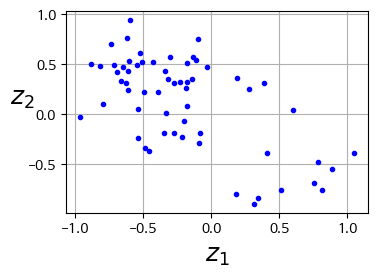

In [6]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

In [7]:
# 추가 코드 - 패션 MNIST 데이터셋 로드, 스케일링 및 분할
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [8]:

tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 12s 5ms/step - loss: 0.0225 - val_loss: 0.0172
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0149 - val_loss: 0.0150
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 6/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0136 - val_loss: 0.0138
Epoch 8/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0135 - val_loss: 0.0137
Epoch 9/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0134 - val_loss: 0.0136
Epoch 10/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0

1/1 [==============================] - 0s 63ms/step


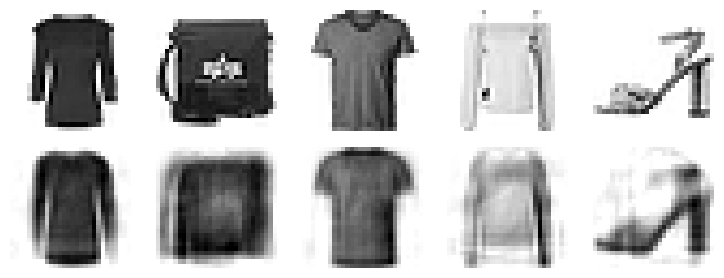

In [9]:
import numpy as np

def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1) # 원래 크기 처럼 다시 그려주는 코드
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
save_fig("reconstruction_plot")  # 추가 코드 - 고해상도 그림 저장
plt.show()

In [13]:
#TSNE이란 같은 특성끼리 있는 것을 몰아 넣는 알고리즘
#머신러닝과 다른 점은 자료를 증가 시킬 수 있고 라벨이 없는 자료를 라벨이 있게 만들 수 있다.
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 [==============================] - 0s 1ms/step


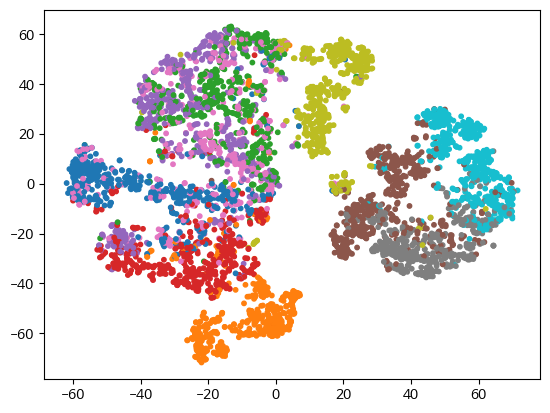

In [11]:
#plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

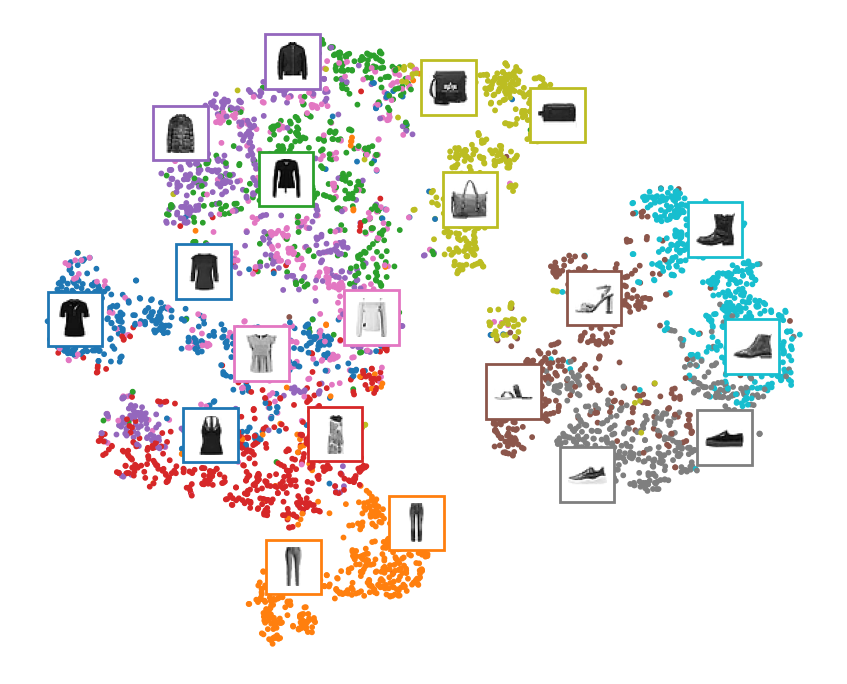

In [12]:
# 추가 코드 - 이전 그래프를 아름답게 꾸밉니다.

import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # 0-1 범위로 정규화
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # 다른 이미지와 충분히 멀리 떨어져 있는 경우
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()


In [14]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=self.dense.input_shape[-1],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)

In [15]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

dense_1 = tf.keras.layers.Dense(100, activation="relu")
dense_2 = tf.keras.layers.Dense(30, activation="relu")

tied_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    tf.keras.layers.Reshape([28, 28])
])

tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
tied_ae.compile(loss="mse", optimizer="nadam")
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.0226 - val_loss: 0.0168
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0139 - val_loss: 0.0139
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0133 - val_loss: 0.0135
Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 10/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.013

1/1 [==============================] - 0s 125ms/step


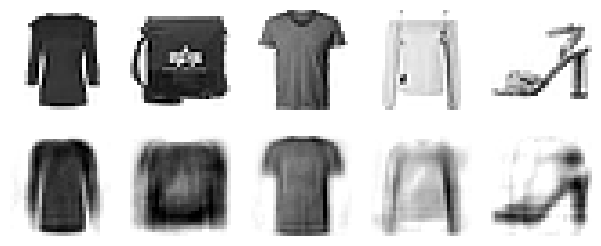

In [16]:
# 추가 코드 - 플롯 재구성
plot_reconstructions(tied_ae)
plt.show()

In [17]:
def train_autoencoder(n_neurons, X_train, X_valid, n_epochs=10,
                      output_activation=None):
    n_inputs = X_train.shape[-1]
    encoder = tf.keras.layers.Dense(n_neurons, activation="relu")
    decoder = tf.keras.layers.Dense(n_inputs, activation=output_activation)
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(loss="mse", optimizer="nadam")
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)


In [18]:
tf.random.set_seed(42)

X_train_flat = tf.keras.layers.Flatten()(X_train)
X_valid_flat = tf.keras.layers.Flatten()(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat)
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, output_activation="relu")

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.0182 - val_loss: 0.0117
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0109
Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.009

잡음 제거 오토인코더

In [19]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])
dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
dropout_ae.compile(loss="mse", optimizer="nadam")
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 5ms/step - loss: 0.0290 - val_loss: 0.0222
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0224 - val_loss: 0.0201
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0211 - val_loss: 0.0193
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0205 - val_loss: 0.0188
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0199 - val_loss: 0.0182
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0196 - val_loss: 0.0181
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0193 - val_loss: 0.0178
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0190 - val_loss: 0.0174
Epoch 9/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0188 - val_loss: 0.0173
Epoch 10/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.01

1/1 [==============================] - 0s 65ms/step


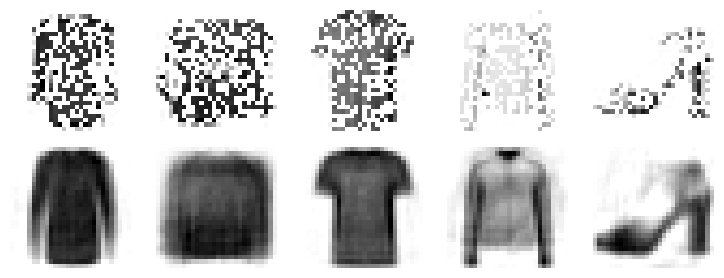

In [20]:
# 추가 코드 - 이 셀은 그림 17-9를 생성하고 저장합니다.
tf.random.set_seed(42)
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot")
plt.show()

In [21]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

sparse_l1_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])
sparse_l1_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
sparse_l1_ae.compile(loss="mse", optimizer="nadam")
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.0276 - val_loss: 0.0192
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0173 - val_loss: 0.0161
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0151 - val_loss: 0.0144
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 9/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 10/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.01

1/1 [==============================] - 0s 74ms/step


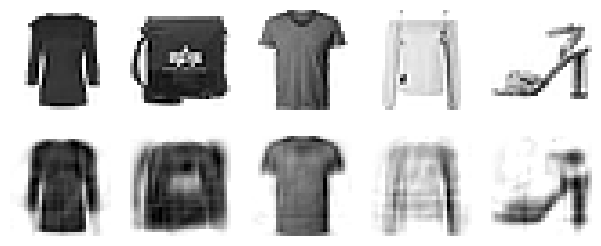

In [22]:
# 추가 코드 - 재구성을 표시합니다.
plot_reconstructions(sparse_l1_ae)
plt.show()

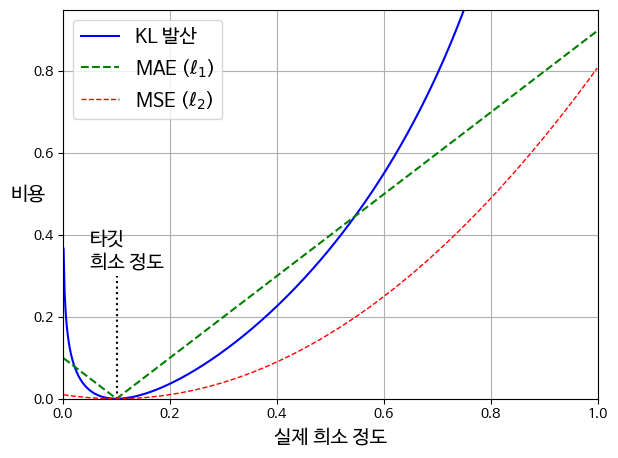

In [23]:
# 추가 코드 - 이 셀은 그림 17-10을 생성하고 저장합니다.
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q) ** 2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "타깃\n희소 정도", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL 발산")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("실제 희소 정도")
plt.ylabel("비용", rotation=0)
plt.axis([0, 1, 0, 0.95])
plt.grid(True)
save_fig("sparsity_loss_plot")

In [24]:
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight, target):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = tf.reduce_mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [25]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)
sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid",
                          activity_regularizer=kld_reg)
])
sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
sparse_kl_ae.compile(loss="mse", optimizer="nadam")
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 6ms/step - loss: 0.0257 - val_loss: 0.0174
Epoch 2/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 8/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0095 - val_loss: 0.0103
Epoch 9/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 10/10
1719/1719 [==============================] - 8s 5ms/step - loss: 

1/1 [==============================] - 0s 99ms/step


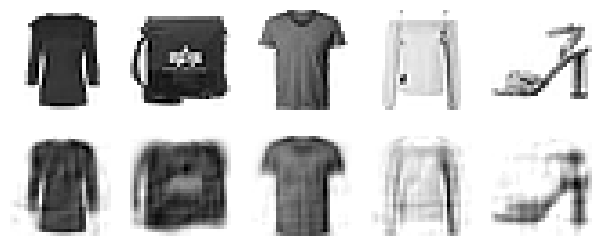

In [26]:
# 추가 코드 - 재구성을 표시합니다.
plot_reconstructions(sparse_kl_ae)
plt.show()

In [29]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [30]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings_size = 10

inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)
variational_ae.compile(loss="mse", optimizer="nadam")
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 7s 7ms/step - loss: 0.0504 - val_loss: 0.0384
Epoch 2/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0363 - val_loss: 0.0352
Epoch 3/25
430/430 [==============================] - 3s 8ms/step - loss: 0.0344 - val_loss: 0.0341
Epoch 4/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0336 - val_loss: 0.0337
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0330 - val_loss: 0.0331
Epoch 6/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0327 - val_loss: 0.0329
Epoch 7/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0324 - val_loss: 0.0329
Epoch 8/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0322 - val_loss: 0.0323
Epoch 9/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0320 - val_loss: 0.0322
Epoch 10/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0319 - val_loss: 0.0321

1/1 [==============================] - 0s 126ms/step


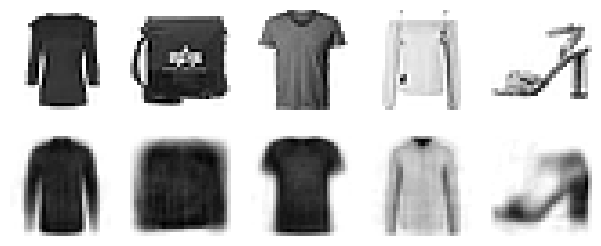

In [31]:
plot_reconstructions(variational_ae)
plt.show()

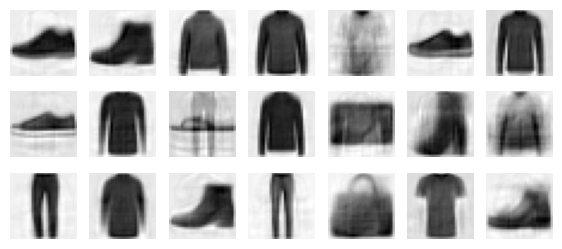

In [32]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings = tf.random.normal(shape=[3 * 7, codings_size])
images = variational_decoder(codings).numpy()

# 추가 코드 - 이 셀은 그림 17-12를 생성하고 저장합니다.

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plot_multiple_images(images, 7)
save_fig("vae_generated_images_plot", tight_layout=False)
plt.show()

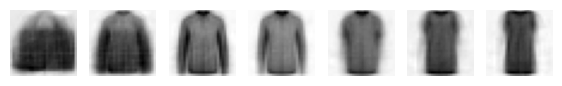

In [33]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings = np.zeros([7, codings_size])
codings[:, 3] = np.linspace(-0.8, 0.8, 7)  # 이 경우 축 3이 가장 좋습니다.
images = variational_decoder(codings).numpy()

# 추가 코드 - 이 셀은 그림 17-13을 생성하고 저장합니다.
plot_multiple_images(images)
save_fig("semantic_interpolation_plot", tight_layout=False)
plt.show()

생성적 적대 신경망

In [34]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings_size = 30

Dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

In [35]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

에포크 1/10


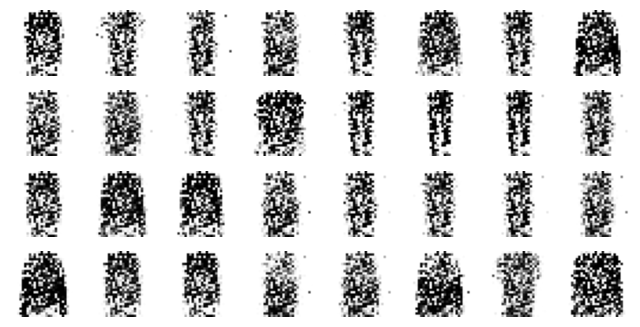

에포크 2/10


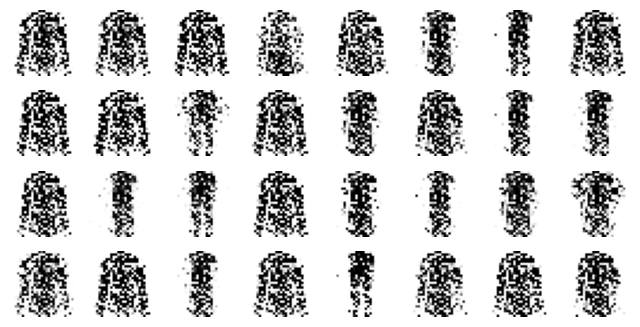

에포크 3/10


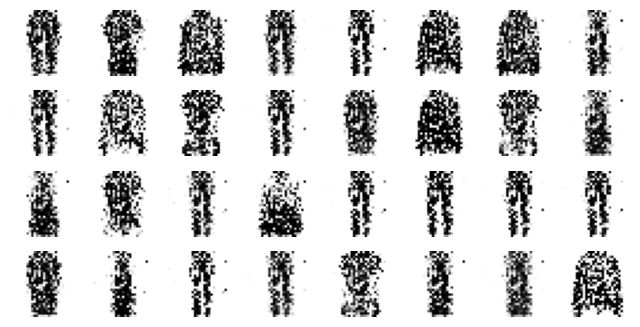

에포크 4/10


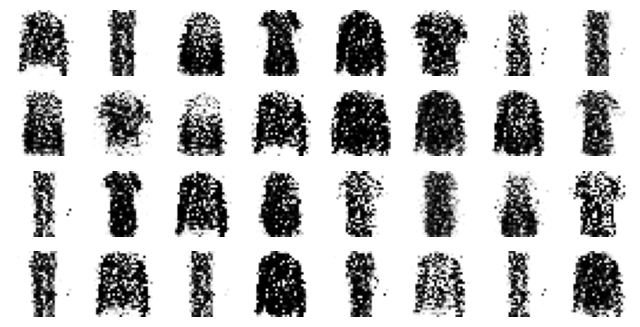

에포크 5/10


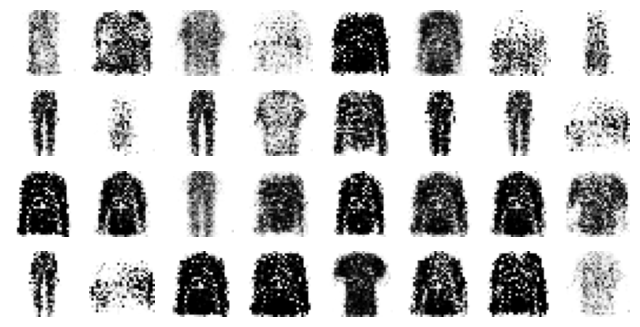

에포크 6/10


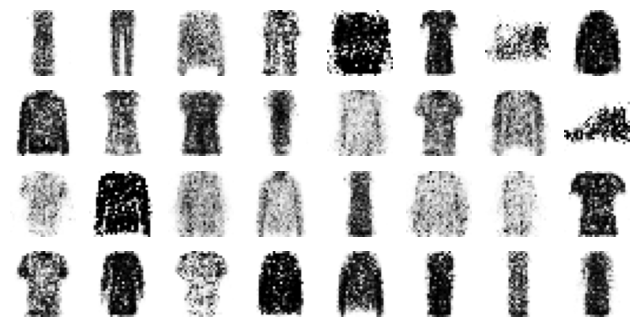

에포크 7/10


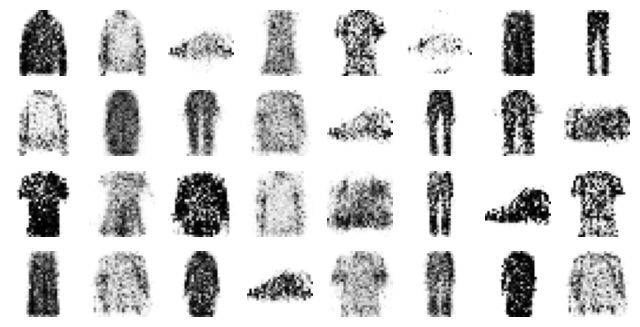

에포크 8/10


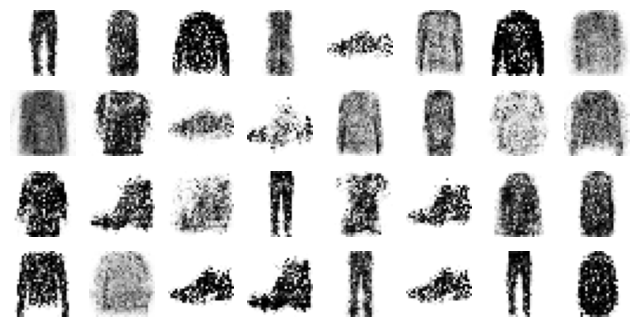

에포크 9/10


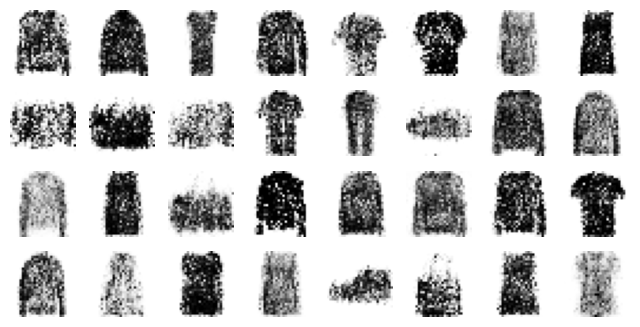

에포크 10/10


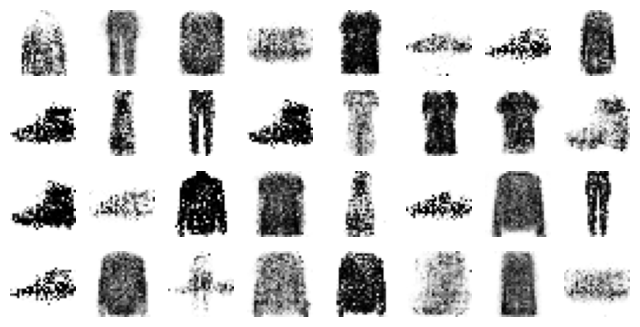

In [36]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"에포크 {epoch + 1}/{n_epochs}")  # 추가 코드
        for X_batch in dataset:
            # 1단계 - 판별자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.train_on_batch(X_fake_and_real, y1)
            # 2단계 - 생성자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            gan.train_on_batch(noise, y2)
        # 추가 코드 - 훈련 중 이미지 출력
        plot_multiple_images(generated_images.numpy(), 8)
        plt.show()

# 코랩에서 메모리 부족 에러를 피하기 위해 n_epochs를 50에서 10으로 바꿉니다.
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10)

In [37]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

1/1 [==============================] - 0s 67ms/step


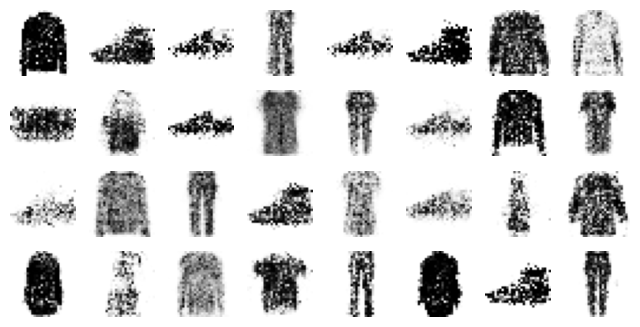

In [38]:
# 추가 코드 - 이 셀은 그림 17-15를 생성하고 저장합니다.
plot_multiple_images(generated_images, 8)
save_fig("gan_generated_images_plot", tight_layout=False)
plt.show()

에포크 1/10


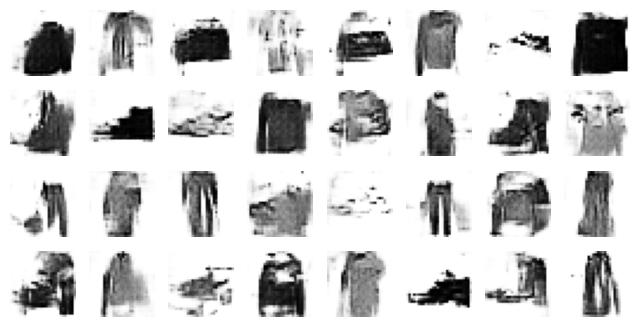

에포크 2/10


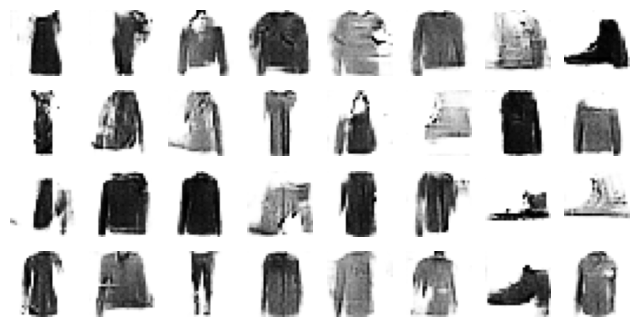

에포크 3/10


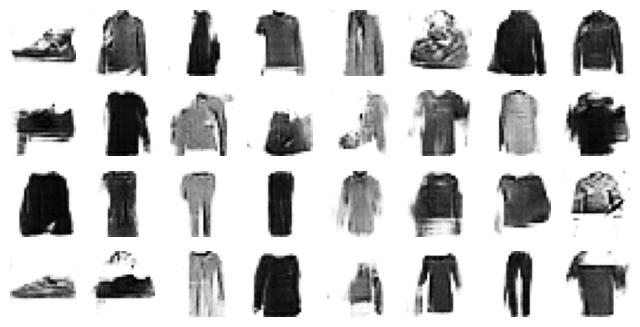

에포크 4/10


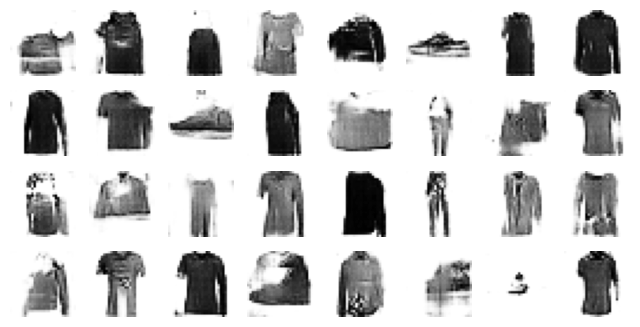

에포크 5/10


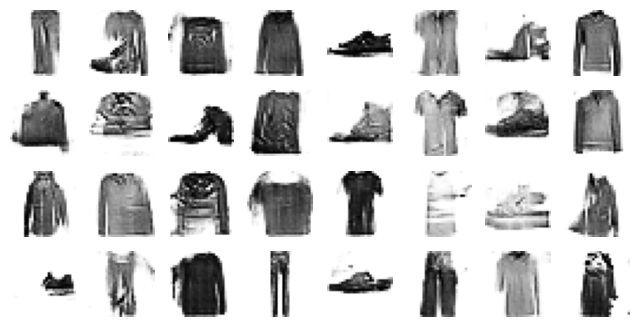

에포크 6/10


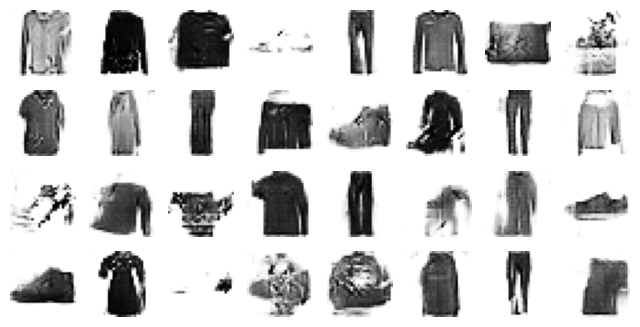

에포크 7/10


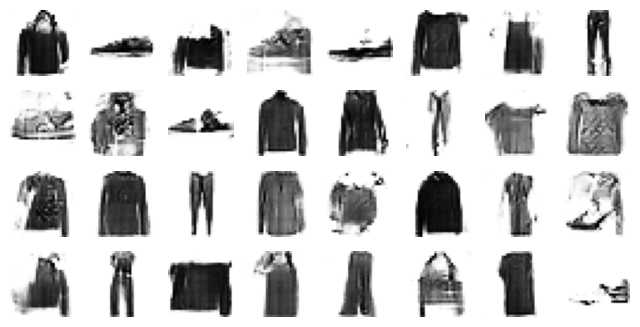

에포크 8/10


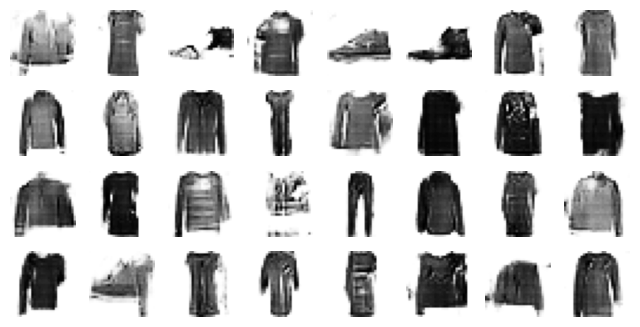

에포크 9/10


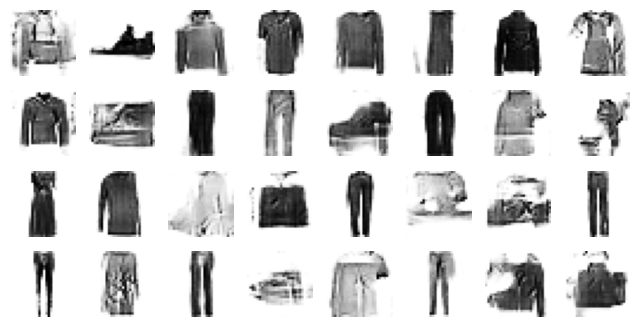

에포크 10/10


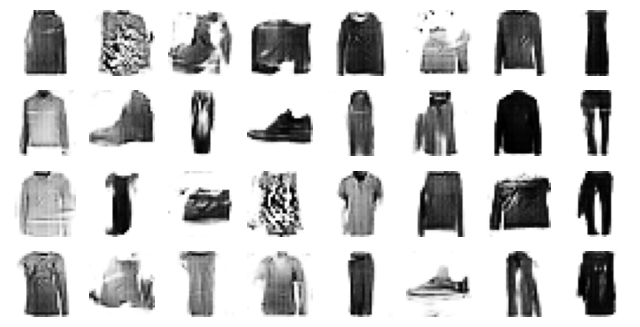

In [39]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

codings_size = 100

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.Reshape([7, 7, 128]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                                    padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                                    padding="same", activation="tanh"),
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])
# 추가 코드 - 앞서와 같이 판별자와 gan을 컴파일합니다.
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # 크기 변경 및 스케일 조정
# 추가 코드 - 앞서와 마찬가지로 데이터셋을 생성하고 GAN을 학습시킵니다.
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
# 코랩에서 메모리 부족 에러를 피하기 위해 n_epochs를 50에서 10으로 바꿉니다.
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10)

1/1 [==============================] - 0s 182ms/step


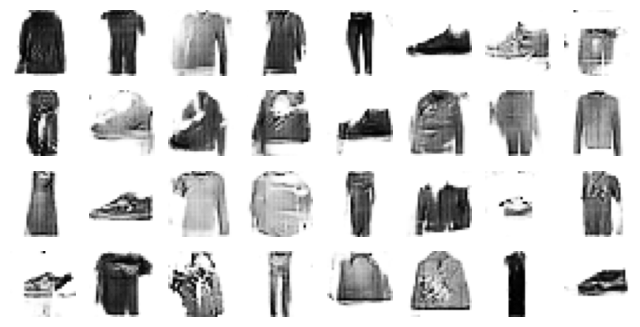

In [40]:

# 추가 코드 - 이 셀은 그림 17-16을 생성하고 저장합니다.
tf.random.set_seed(42)
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(noise)
plot_multiple_images(generated_images, 8)
save_fig("dcgan_generated_images_plot", tight_layout=False)

In [41]:
def variance_schedule(T, s=0.008, max_beta=0.999):
    t = np.arange(T + 1)
    f = np.cos((t / T + s) / (1 + s) * np.pi / 2) ** 2
    alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
    alpha = np.append(1, alpha).astype(np.float32)  # add α₀ = 1
    beta = 1 - alpha
    alpha_cumprod = np.cumprod(alpha)
    return alpha, alpha_cumprod, beta  # αₜ , α̅ₜ , βₜ for t = 0 to T

np.random.seed(42)  # 추가 코드 - 재현성을 위한
T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)

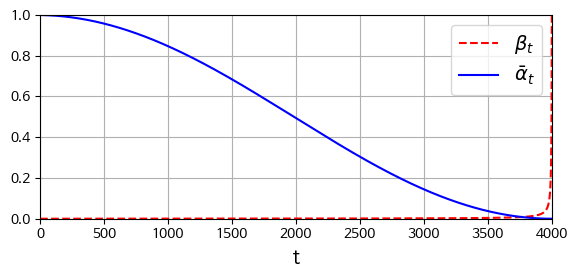

In [42]:
# 추가 코드 - 이 셀은 그림 17-21을 생성하고 저장합니다.
plt.figure(figsize=(6, 3))
plt.plot(beta, "r--", label=r"$\beta_t$")
plt.plot(alpha_cumprod, "b", label=r"$\bar{\alpha}_t$")
plt.axis([0, T, 0, 1])
plt.grid(True)
plt.xlabel(r"t")
plt.legend()
save_fig("variance_schedule_plot")
plt.show()


In [43]:
def prepare_batch(X):
    X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1  # -1에서 +1까지 스케일링
    X_shape = tf.shape(X)
    t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
    alpha_cm = tf.gather(alpha_cumprod, t)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    noise = tf.random.normal(X_shape)
    return {
        "X_noisy": alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise,
        "time": t,
    }, noise


In [44]:
def prepare_dataset(X, batch_size=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(X)
    if shuffle:
        ds = ds.shuffle(10_000)
    return ds.batch(batch_size).map(prepare_batch).prefetch(1)

tf.random.set_seed(43)  # 추가 코드 - CPU에서 재현성 보장
train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

원본 이미지


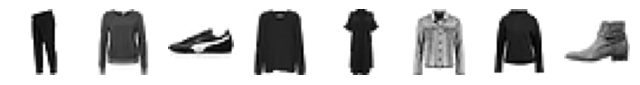

타임 스텝: [3405  312 3441 1991 2443 1657 3308 1151]
잡음 이미지


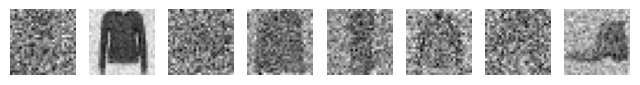

예측할 잡음


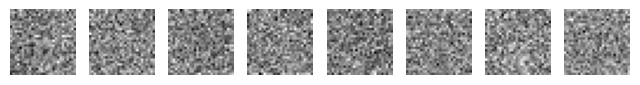

In [45]:
# 추가 코드 - 간단한 데이터 검증

def subtract_noise(X_noisy, time, noise):
    X_shape = tf.shape(X_noisy)
    alpha_cm = tf.gather(alpha_cumprod, time)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    return (X_noisy - (1 - alpha_cm) ** 0.5 * noise) / alpha_cm ** 0.5

X_dict, Y_noise = list(train_set.take(1))[0]  # get the first batch
X_original = subtract_noise(X_dict["X_noisy"], X_dict["time"], Y_noise)

print("원본 이미지")
plot_multiple_images(X_original[:8].numpy())
plt.show()
print("타임 스텝:", X_dict["time"].numpy()[:8])
print("잡음 이미지")
plot_multiple_images(X_dict["X_noisy"][:8].numpy())
plt.show()
print("예측할 잡음")
plot_multiple_images(Y_noise[:8].numpy())
plt.show()

In [46]:
# 추가 코드 - 사용자 정의 시간 인코딩 층을 구현합니다.

embed_size = 64

class TimeEncoding(tf.keras.layers.Layer):
    def __init__(self, T, embed_size, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        assert embed_size % 2 == 0, "embed_size must be even"
        p, i = np.meshgrid(np.arange(T + 1), 2 * np.arange(embed_size // 2))
        t_emb = np.empty((T + 1, embed_size))
        t_emb[:, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
        t_emb[:, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T
        self.time_encodings = tf.constant(t_emb.astype(self.dtype))

    def call(self, inputs):
        return tf.gather(self.time_encodings, inputs)

In [47]:
def build_diffusion_model():
    X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name="X_noisy")
    time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name="time")
    time_enc = TimeEncoding(T, embed_size)(time_input)

    dim = 16
    Z = tf.keras.layers.ZeroPadding2D((3, 3))(X_noisy)
    Z = tf.keras.layers.Conv2D(dim, 3)(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)
    Z = tf.keras.layers.Activation("relu")(Z)

    time = tf.keras.layers.Dense(dim)(time_enc)  # 시간 인코딩 적용
    Z = time[:, tf.newaxis, tf.newaxis, :] + Z  # 모든 픽셀에 시간 데이터 추가

    skip = Z
    cross_skips = []  # UNet의 다운샘플링 & 업샘플링을 가로지르는 스킵 연결

    for dim in (32, 64, 128):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        cross_skips.append(Z)
        Z = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(Z)
        skip_link = tf.keras.layers.Conv2D(dim, 1, strides=2,
                                           padding="same")(skip)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        skip = Z

    for dim in (64, 32, 16):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.UpSampling2D(2)(Z)

        skip_link = tf.keras.layers.UpSampling2D(2)(skip)
        skip_link = tf.keras.layers.Conv2D(dim, 1, padding="same")(skip_link)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        Z = tf.keras.layers.concatenate([Z, cross_skips.pop()], axis=-1)
        skip = Z

    outputs = tf.keras.layers.Conv2D(1, 3, padding="same")(Z)[:, 2:-2, 2:-2]
    return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])

In [48]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer="nadam")

# 추가 코드 - 모델 체크포인트 콜백을 추가합니다.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_diffusion_model",
                                                   save_best_only=True)

history = model.fit(train_set, validation_data=valid_set, epochs=100,
                    callbacks=[checkpoint_cb])  # 추가 코드

Epoch 1/100
1719/1719 [==============================] - 90s 35ms/step - loss: 0.0979 - val_loss: 0.0665
Epoch 2/100
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0589 - val_loss: 0.0526
Epoch 3/100
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0503 - val_loss: 0.0494
Epoch 4/100
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0475 - val_loss: 0.0478
Epoch 5/100
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0456 - val_loss: 0.0440
Epoch 6/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0445 - val_loss: 0.0458
Epoch 7/100
 208/1719 [==>...........................] - ETA: 38s - loss: 0.0436

KeyboardInterrupt: 

In [ ]:
def generate(model, batch_size=32):
    X = tf.random.normal([batch_size, 28, 28, 1])
    for t in range(T - 1, 0, -1):
        print(f"\rt = {t}", end=" ")  # 추가 코드 - 진행률 표시
        noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape(X))
        X_noise = model({"X_noisy": X, "time": tf.constant([t] * batch_size)})
        X = (
            1 / alpha[t] ** 0.5
            * (X - beta[t] / (1 - alpha_cumprod[t]) ** 0.5 * X_noise)
            + (1 - alpha[t]) ** 0.5 * noise
        )
    return X

tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장
X_gen = generate(model)  # 생성된 이미지

In [ ]:
plot_multiple_images(X_gen.numpy(), 8)
save_fig("ddpm_generated_images_plot")
plt.show()